In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import viz # curriculum example visualizations

np.random.seed(29)

We stil have three other commonly used random functions that we haven't practiced yet:
- `np.random.uniform`: generates numbers between a given lower and upper bound
- `np.random.randn`: generates numbers from the standard normal distribution
- `np.random.normal`: generates numbers from a normal distribution with a specified mean and standard deviation

Take some time to review the documentation of each, then start working on the exercises:

# Simulation Exercises

Using the repo setup directions, setup a new local and remote repository named `statistics-exercises`. The local version of your repo should live inside of `~/codeup-data-science`. This repo should be named `statistics-exercises`.

Do your work for this exercise in either a python file named `simulation.py` or a jupyter notebook named `simulation.ipynb`.

1. How likely is it that you roll doubles when rolling two dice?




In [2]:
import numpy as np
from collections import Counter
from itertools import *

die_n = 2
max_num = 6

die = np.arange(1,max_num+1)
C0,C1  = Counter(), Counter()

for roll in product(die,repeat=die_n):
    if len(set(roll)) > 1: C0[sum(roll)] += 1
    else: C1[sum(roll)] += 1

die

#n_trials = 10_000
#n_dice = 2
#dice = np.random.choice([1,2,3,4,5,6], (n_trials, n_dice))
#dice

array([1, 2, 3, 4, 5, 6])



2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?



In [3]:
flips = np.random.choice([0, 1], size = (100000, 8))
flips

array([[1, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 1, 1, 1]])

In [8]:
flips.sum(axis = 1)

array([4, 4, 5, ..., 5, 5, 4])

In [9]:
flips.sum(axis = 1) == 3

array([False, False, False, ..., False, False, False])

In [10]:
(flips.sum(axis = 1) == 3).mean()

0.21903

In [11]:
# prob of getting > 3 heads
(flips.sum(axis = 1) > 3).mean()

0.6361




3. There are approximately 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?


In [12]:
# WD = 0, DS = 1
bb = np.random.choice([0, 1], size = (100000, 2), p = [0.75, 0.25])
bb

array([[0, 0],
       [1, 0],
       [1, 1],
       ...,
       [0, 0],
       [0, 0],
       [1, 0]])

In [13]:
p = (bb.sum(axis = 1) == 2).mean()
p

0.0624

In [14]:
1-p

0.9376

In [15]:

odds = p / (1 - p)
odds

0.06655290102389078


4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal) You'll need to make a judgement call on how to handle some of your values.


In [16]:
pop = np.random.normal(3, 1.5, size = (10000, 5))
pop

array([[4.54469314, 3.77738245, 2.15986787, 2.65850963, 2.94780194],
       [3.353336  , 5.24832424, 1.8264699 , 4.15910693, 4.27858963],
       [1.14771529, 3.33092781, 0.74236646, 2.53642612, 3.27831909],
       ...,
       [4.59638393, 3.27582886, 0.5271786 , 0.40273212, 3.88414134],
       [3.41883686, 2.01339258, 2.61499843, 3.65267513, 4.00542439],
       [1.76383107, 2.40535417, 1.6258987 , 2.64116666, 2.56084403]])

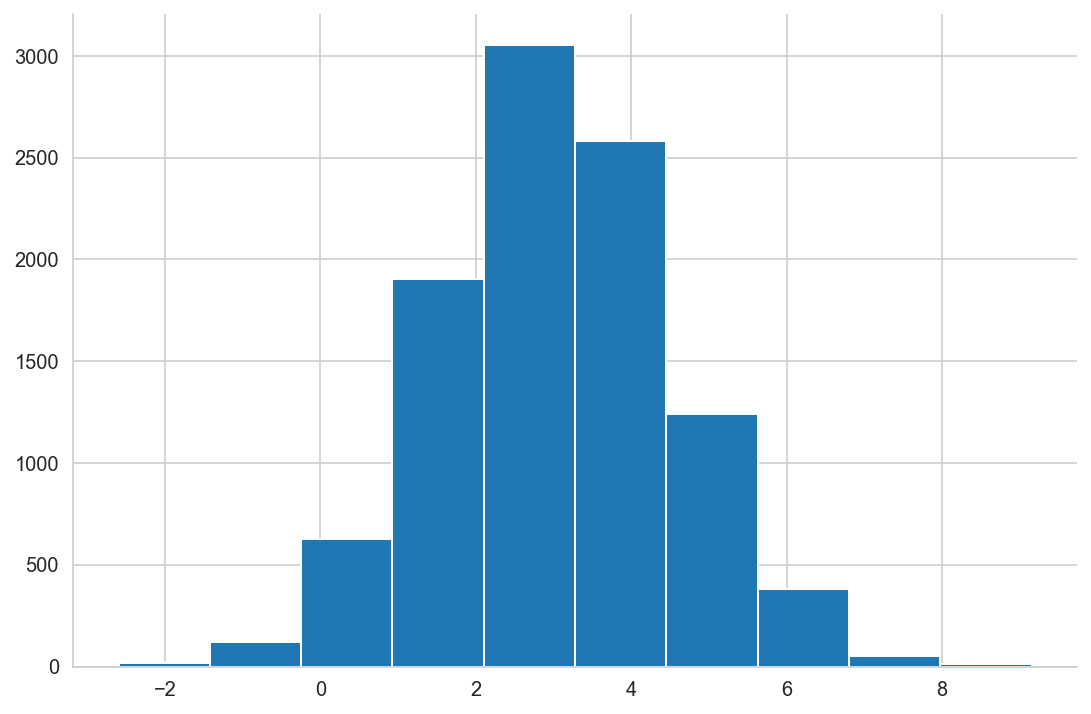

In [17]:
plt.hist(np.random.normal(3, 1.5, size = (10000)));

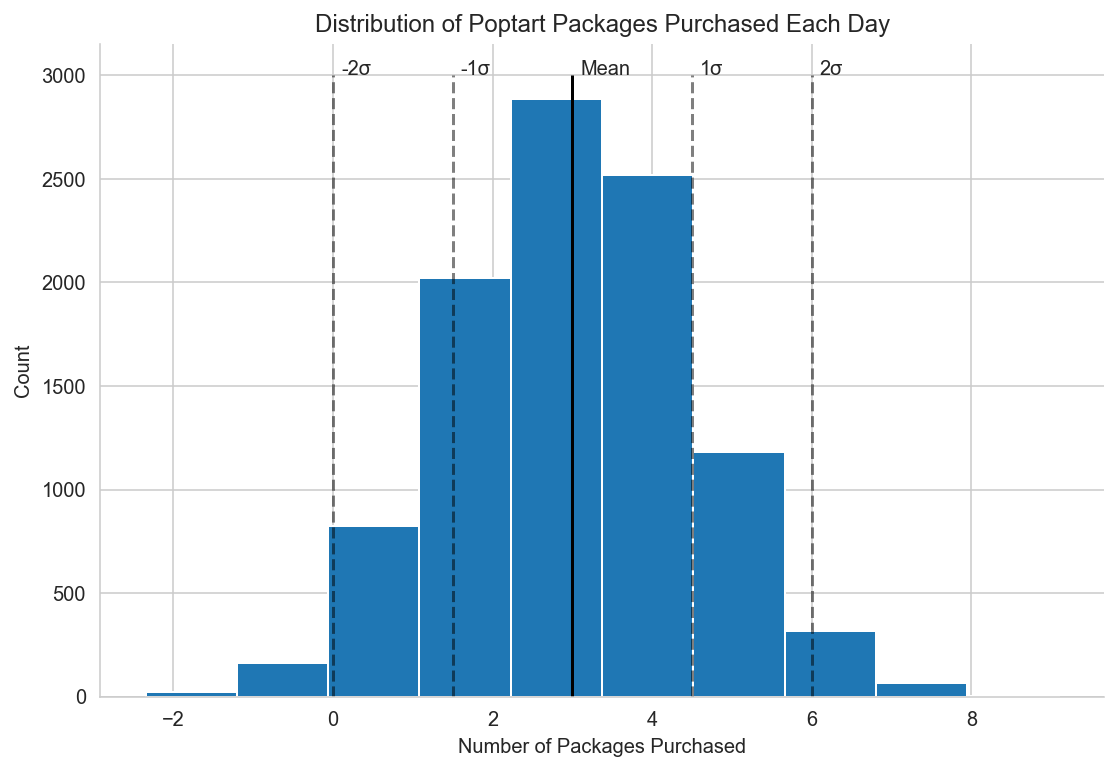

In [18]:
plt.hist(np.random.normal(3, 1.5, size = (10000)))
plt.title('Distribution of Poptart Packages Purchased Each Day')
plt.vlines(3, 0, 3000, color='black')
plt.text(3.1, 3000, 'Mean')
plt.vlines(4.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(4.6, 3000, '1σ')
plt.vlines(6.0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(6.1, 3000, '2σ')
plt.vlines(1.5, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(1.6, 3000, '-1σ')
plt.vlines(0, 0, 3000, color='black', ls='--', alpha=0.5)
plt.text(0.1, 3000, '-2σ')
plt.ylabel('Count')
plt.xlabel('Number of Packages Purchased')
plt.show()

In [19]:
pop.sum(axis = 1)

array([16.08825503, 18.8658267 , 11.03575477, ..., 12.68626486,
       15.7053274 , 10.99709463])

In [20]:
pop.sum(axis = 1) <= 16

array([False, False,  True, ...,  True,  True,  True])

In [21]:
(pop.sum(axis = 1) <= 16).mean()

0.6196


5. Compare Heights

- Men have an average height of 178 cm and standard deviation of 8cm.
- Women have a mean of 170, sd = 6cm.
- Since you have means and standard deviations, you can use `np.random.normal` to generate observations.
- If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?

In [22]:
men = np.random.normal(178, 8, size = 10000)
women = np.random.normal(170, 6, size = 10000)
women

array([170.06353687, 169.77999182, 168.36303845, ..., 167.98855728,
       164.07640239, 170.60721779])

In [23]:
(women > men).mean()

0.2155

In [28]:
install_100 = np.random.choice([0,1], size = (10000, 100), p = [249/250, 1/250 ] )
install_100


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])


7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park.
- However, you haven't seen a food truck there in 3 days. How unlikely is this?
- How likely is it that a food truck will show up sometime this week?

In [29]:
trucks = np.random.choice([0, 1], size = (10000, 3), p = [0.3, 0.7] )
trucks

array([[1, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [1, 0, 1],
       [1, 0, 0],
       [1, 0, 1]])

In [30]:
(trucks.sum(axis = 1) == 0).mean()

0.0288

In [31]:
trucks1 = np.random.choice([0, 1], size = (10000, 5), p = [0.3, 0.7] )
trucks1

array([[0, 1, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 0, 1, 1],
       ...,
       [1, 1, 1, 0, 1],
       [1, 1, 1, 0, 0],
       [0, 1, 1, 0, 0]])

In [32]:
(trucks1.sum(axis = 1) >= 1).mean()

0.9971



8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40 people?

Be sure to add, commit, and push your work. Additional bonus exercises are available on the curriculum website.


In [33]:
bd = np.random.choice(range(1,366), size = (10000, 23))
bd


array([[ 21, 200, 268, ..., 304,   6, 175],
       [134, 139, 154, ...,  58,  66, 158],
       [ 19,  24, 231, ..., 257, 282,  41],
       ...,
       [235, 264, 309, ..., 190, 211, 302],
       [160, 110, 222, ..., 249, 251,  80],
       [ 20, 145, 166, ..., 355, 286, 362]])

In [35]:
pd.DataFrame(bd).nunique(axis = 1)
(pd.DataFrame(bd).nunique(axis = 1) < 23).mean()

0.5134


8. If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?


In [36]:
pd.DataFrame(bd).nunique(axis = 1)
(pd.DataFrame(bd).nunique(axis = 1) < 23).mean()


0.5134

In [37]:
n_simulations = 100_000
n_people = 20

In [38]:
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)
df["n_unique"] = df.nunique(axis=1)
(df.n_unique != n_people).mean()


0.41098

In [39]:
n_simulations = 100_000
n_people = 40


In [40]:
birthdays = np.random.choice(range(365), size=(n_simulations, n_people))
df = pd.DataFrame(birthdays)
df["n_unique"] = df.nunique(axis=1)
(df.n_unique != n_people).mean()

0.89158